# 4.11.07 Dense network

### Load data

In [1]:
# import commands
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load the train features npz file
with np.load("train_features.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_features=tr["tr_features"]

In [3]:
# Load the train batch npz file
with np.load("train_batch.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_batch_imgs=tr["tr_batch_imgs"], 
    tr_batch_labels=tr["tr_batch_labels"]

In [4]:
# Load the test features npz file
with np.load("test_features.npz", allow_pickle=False) as te:
    # Load the arrays
    te_features=te["te_features"]

In [5]:
# Load the test batch npz file
with np.load("test_batch.npz", allow_pickle=False) as te:
    # Load the arrays
    te_batch_imgs=te["te_batch_imgs"], 
    te_batch_labels=te["te_batch_labels"]

In [6]:
# Load the validation features npz file
with np.load("valid_features.npz", allow_pickle=False) as vl:
    # Load the arrays
    vl_features=vl["vl_features"]

In [7]:
# Load the validation batch npz file
with np.load("valid_batch.npz", allow_pickle=False) as vl:
    # Load the arrays
    vl_batch_imgs=vl["vl_batch_imgs"], 
    vl_batch_labels=vl["vl_batch_labels"]

## Task 1: 1-layer dense network
Try with neural networks 1-layer dense network i.e. no hidden layer, just the input and output ones.

In [8]:
#import command
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import initializers

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
### Create model
model_1layer = Sequential()

# layer
model_1layer.add(InputLayer(input_shape=(1280), 
                            name='Input_Layer'))

# Output layer
model_1layer.add(Dense(6, 
                       activation="softmax",  
                       input_dim=1280,
                       kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0),))

# Print network summary
model_1layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 7,686
Trainable params: 7,686
Non-trainable params: 0
_________________________________________________________________


2022-08-19 13:54:08.706466: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from tensorflow.keras import optimizers

# Define loss function, optimizer and metrics to track during training
model_1layer.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [11]:
# End training when accuracy stops improving
import tensorflow.keras as keras
from keras.callbacks import EarlyStopping

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=6)

In [12]:
# Fit model
history_1layer = model_1layer.fit(
    x=tr_features,
    y=tr_batch_labels,
    batch_size=32,
    epochs=100,
    validation_data=(vl_features, vl_batch_labels),
    shuffle=True,  # Shuffle training samples,
    callbacks=[early_stopping]
)

Epoch 1/100
9/9 [==============================] - 1s 37ms/step - loss: 1.4677 - acc: 0.4964 - val_loss: 1.0433 - val_acc: 0.7554
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.8834 - acc: 0.7893 - val_loss: 0.7479 - val_acc: 0.8058
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6541 - acc: 0.8393 - val_loss: 0.6084 - val_acc: 0.8417
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 0.5265 - acc: 0.8643 - val_loss: 0.5252 - val_acc: 0.8633
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 0.4468 - acc: 0.8964 - val_loss: 0.4740 - val_acc: 0.8921
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.3907 - acc: 0.9179 - val_loss: 0.4364 - val_acc: 0.8849
Epoch 7/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3468 - acc: 0.9286 - val_loss: 0.4091 - val_acc: 0.8849
Epoch 8/100
9/9 [==============================] - 0s 20ms/step - loss: 0.3144 - acc: 0.9321

In [13]:
# The history object saved the scores during training
history_1layer.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

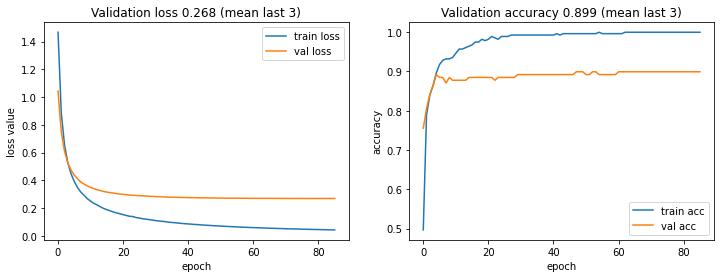

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history_1layer.history["loss"], label="train loss")
ax1.plot(history_1layer.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history_1layer.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history_1layer.history["acc"], label="train acc")
ax2.plot(history_1layer.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history_1layer.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.show()

_Observation: The loss curves are descreasing, and the accuracy curves are increasing._

In [15]:
(test_loss, test_accuracy) = model_1layer.evaluate(te_features, te_batch_labels, batch_size=32)

print("Test loss: {:.2f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(100 * test_accuracy))

2/2 [==============================] - 0s 3ms/step - loss: 0.2077 - acc: 0.9400
Test loss: 0.21
Test accuracy: 94.00%


## Task 2: 2-layer dense network
Try with 2-layer dense network i.e. one hidden layer.

In [16]:
# Create model
model_2layer = Sequential()


# 1 Layer
model_2layer.add(Dense(64, activation="relu",  
                       input_dim=1280,
                       kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0),))

# 2 layer
model_2layer.add(Dense(6, 
                       activation="softmax",  
                       kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0),))

# Print network summary
model_2layer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                81984     
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 82,374
Trainable params: 82,374
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Define loss function, optimizer and metrics to track during training
model_2layer.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [18]:
# Fit model
history_2layer = model_2layer.fit(
    x=tr_features,
    y=tr_batch_labels,
    batch_size=32,
    epochs=100,
    validation_data=(vl_features, vl_batch_labels),
    shuffle=True,  # Shuffle training samples
    callbacks=[early_stopping]
)

Epoch 1/100
9/9 [==============================] - 0s 23ms/step - loss: 1.7485 - acc: 0.3143 - val_loss: 1.4239 - val_acc: 0.5612
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 1.2496 - acc: 0.6571 - val_loss: 1.0814 - val_acc: 0.6906
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 0.9675 - acc: 0.7464 - val_loss: 0.8680 - val_acc: 0.7770
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7792 - acc: 0.8286 - val_loss: 0.7284 - val_acc: 0.7770
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6529 - acc: 0.8571 - val_loss: 0.6349 - val_acc: 0.8201
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5616 - acc: 0.8786 - val_loss: 0.5689 - val_acc: 0.8489
Epoch 7/100
9/9 [==============================] - 0s 12ms/step - loss: 0.4931 - acc: 0.8964 - val_loss: 0.5185 - val_acc: 0.8489
Epoch 8/100
9/9 [==============================] - 0s 11ms/step - loss: 0.4435 - acc: 0.9071 

In [19]:
# The history object saved the scores during training
history_2layer.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

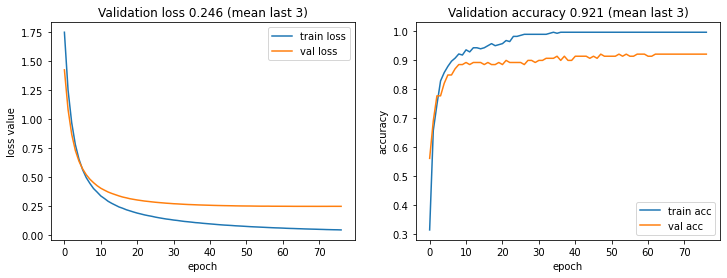

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history_2layer.history["loss"], label="train loss")
ax1.plot(history_2layer.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history_2layer.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history_2layer.history["acc"], label="train acc")
ax2.plot(history_2layer.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history_2layer.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.show()

_Observation: The curves look similar to the ones from the 1-layer dense network._

In [21]:
(test_loss, test_accuracy) = model_2layer.evaluate(te_features, te_batch_labels, batch_size=32)

print("Test loss: {:.2f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(100 * test_accuracy))

2/2 [==============================] - 0s 9ms/step - loss: 0.2140 - acc: 0.9400
Test loss: 0.21
Test accuracy: 94.00%
